# Loading the dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_1 = pd.read_csv('/content/drive/My Drive/Russia_invade.csv')
df_2 = pd.read_csv('/content/drive/My Drive/Russian_border_Ukraine.csv')
df_3 = pd.read_csv('/content/drive/My Drive/Russian_troops.csv')
df_4 = pd.read_csv('/content/drive/My Drive/StandWithUkraine.csv')
df_5 = pd.read_csv('/content/drive/My Drive/Ukraine_border.csv')
df_6 = pd.read_csv('/content/drive/My Drive/Ukraine_nato.csv')
df_7 = pd.read_csv('/content/drive/My Drive/Ukraine_troops.csv')
df_8 = pd.read_csv('/content/drive/My Drive/Ukraine_war.csv')



In [7]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis=0)
df.reset_index(inplace=True)

In [5]:
df.shape

(1316605, 30)

In [ ]:
df.head()

,index,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,0,snscrape.modules.twitter.Tweet,https://twitter.com/pat_ianni/status/150025982...,2022-03-05 23:59:50+00:00,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,1500259827154505728,"{'_type': 'snscrape.modules.twitter.User', 'us...",14,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia invade
1,1,snscrape.modules.twitter.Tweet,https://twitter.com/luxeprogressive/status/150...,2022-03-05 23:59:05+00:00,@ProfPaulPoast He doesn’t have to like it but ...,@ProfPaulPoast He doesn’t have to like it but ...,1500259636863246336,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
2,2,snscrape.modules.twitter.Tweet,https://twitter.com/spielblog/status/150025947...,2022-03-05 23:58:26+00:00,@SemproniusT @RichardHanania And if NATO is th...,@SemproniusT @RichardHanania And if NATO is th...,1500259474040180738,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
3,3,snscrape.modules.twitter.Tweet,https://twitter.com/JumboSlunce/status/1500259...,2022-03-05 23:58:20+00:00,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,1500259447742115841,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,...,NaN,NaN,1.500248e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
4,4,snscrape.modules.twitter.Tweet,https://twitter.com/ronanmcmanus/status/150025...,2022-03-05 23:58:17+00:00,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,1500259435142340608,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,1.500258e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade


# Data Analysis

In [ ]:
df.isnull().sum()

index                     0
_type                     0
url                       0
date                      0
content                   0
renderedContent           0
id                        0
user                      0
replyCount                0
retweetCount              0
likeCount                 0
quoteCount                0
conversationId            0
lang                      0
source                    0
sourceUrl                 0
sourceLabel               0
outlinks             879335
tcooutlinks          879335
media               1164571
retweetedTweet      1316605
quotedTweet         1179985
inReplyToTweetId     722546
inReplyToUser        722546
mentionedUsers       643642
coordinates         1298997
place               1298997
hashtags             979343
cashtags            1313780
Searh                     0
dtype: int64

In [ ]:
lang_count = df['lang'].value_counts()

lang_count.index

Index(['en', 'und', 'de', 'ja', 'pl', 'pt', 'fr', 'uk', 'it', 'es', 'tr', 'ru',
       'da', 'nl', 'cs', 'in', 'hi', 'fi', 'et', 'sv', 'ar', 'tl', 'zh', 'ro',
       'ca', 'lv', 'fa', 'el', 'vi', 'ko', 'no', 'th', 'ta', 'ht', 'sl', 'cy',
       'lt', 'hu', 'bg', 'sr', 'ka', 'iw', 'ur', 'bn', 'eu', 'gu', 'kn', 'ml',
       'te', 'pa', 'mr', 'ne', 'is', 'my', 'am', 'ps', 'sd', 'dv', 'si', 'km',
       'or'],
      dtype='object')

In [ ]:
lang_count[:10]

en     1206985
und      42960
de       28269
ja        4612
pl        4100
pt        3491
fr        3257
uk        2712
it        2658
es        2590
Name: lang, dtype: int64

In [ ]:
hashtag_list = []

def get_hashtag(tweet):
    hashtags = re.findall(r"#(\w+)", tweet)
    hashtag_list.extend(hashtags)

In [ ]:
for tweet in df['content']:
    get_hashtag(tweet)

print("total unique hashtags: ", len(hashtag_list))
print(hashtag_list[1:50])

hashtag_set = set(hashtag_list)

total unique hashtags:  973564
['Britain', 'Russia', 'Iraq', 'Ukraine', 'NATO', 'WMD', 'Lies', 'Russians', 'Putin', 'Ukraine', 'Repubicans', 'InformationInvasion', 'RussianInfoInvade', 'aeroflot', 'auspol', 'UkraineRussianWar', 'BidenWorstPresidentEver', 'BidenIsAFailure', 'BidensWar', 'WhereWasLewisHamiltonWhen', 'RussianUkrainianWar', 'Putin', 'Russia', 'Ukraine', 'UK', 'Russia', 'Putin', 'Ukraine', 'Putin', 'Biden', 'Ukraine', 'russia', 'ukraine', 'Russian', 'Ukraine', 'Putin', 'MentalHealthMatters', 'dementia', 'StopPutinNOW', 'IStandWithUkraine', 'SlavaUkraini', 'Ukraine', 'Russia', 'BidenIsALaughingstock', 'SaveUkraine', 'PutinWarCrimes', 'RussianUkrainianWar', 'RussianUkrainianWar', 'Ukraine']


In [ ]:
def hashtag_freq(hashtag_list):
    a = nltk.FreqDist(hashtag_list)
    hash_df = pd.DataFrame({'Hashtag': list(a.keys()), 
                            'Frequency': list(a.values())
                           })
    
    hash_df = hash_df.nlargest(columns='Frequency', n = 25)
    
    return hash_df
    

In [ ]:
hash_df = hashtag_freq(hashtag_list)

hash_df

,Hashtag,Frequency
4,Ukraine,130203
66,StandWithUkraine,120481
2,Russia,59859
5,NATO,35721
9,Putin,20038
25,Russian,13980
24,ukraine,9504
359,UkraineCrisis,7549
279,UkraineWar,7052
0,USA,6834


# Data Preprocessing

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
stemmer = nltk.PorterStemmer()

In [10]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [11]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n|\t', '', text)
    text = re.sub('\d', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = [word for word in text.split() if word not in stopwords]
    text = [stemmer.stem(word) for word in text]
    
    text = " ".join(text)
    
    return text
    

In [ ]:
df['clean_tweet'] = df['content'].apply(preprocess)

In [13]:
avg_tweet_len = df['content'].str.len().mean()
avg_word_count = df['content'].str.split().str.len().mean()

print('Original Tweets: ')
print(int(avg_tweet_len))
print(int(avg_word_count))


avg_clean_tweet_len = df['clean_tweet'].str.len().mean()
avg_clean_word_count = df['clean_tweet'].str.split().str.len().mean()

print('Preprocessed Tweets: ')
print(int(avg_clean_tweet_len))
print(int(avg_clean_word_count))


Original Tweets: 
197
30
Preprocessed Tweets: 
119
18


In [14]:
from textblob import TextBlob

In [15]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if (analysis.sentiment.polarity > 0):
        return 1
    else:
        return 0
        

In [16]:
df['sentiment'] = df['clean_tweet'].apply(lambda x : sentiment_analysis(x))

In [ ]:
data = df[['clean_tweet', 'sentiment', 'retweetCount', 'likeCount']]

In [ ]:
data.head()

,clean_tweet,sentiment,retweetCount,likeCount
0,joe biden say get place putin decid invad russ...,0,26,99
1,profpaulpoast like countri sovereign proven va...,0,0,2
2,semproniust richardhanania nato aggressor mayb...,1,0,0
3,jakehas groutandgo mysticaura_ skylarjordan al...,0,0,0
4,__t___d carolecadwalla estellecostanza point u...,0,0,0


# Data Visualization

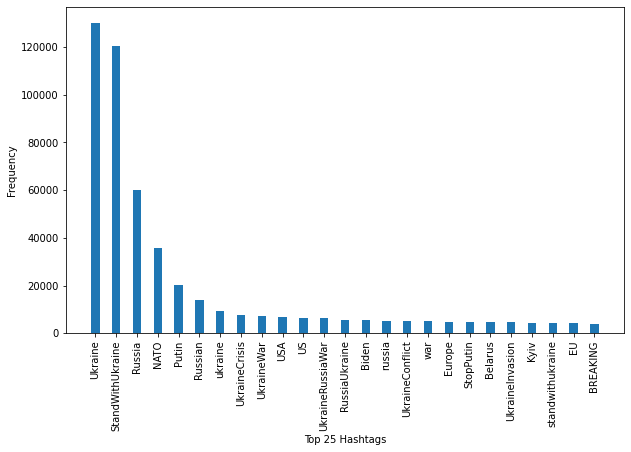

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.bar(hash_df['Hashtag'], hash_df['Frequency'], width=0.4)

plt.xlabel("Top 25 Hashtags")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()


In [ ]:
text = " ".join(text for text in data['clean_tweet'])

len(text) 

158016172

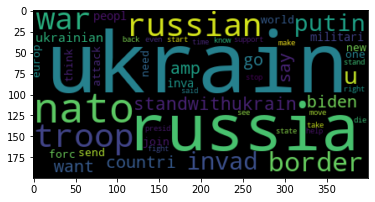

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(max_font_size=100,  max_words = 50,collocations=False).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.show()


In [ ]:
df_pos = data[data['sentiment'] == 1]
df_pos.head()

,clean_tweet,sentiment,retweetCount,likeCount
2,semproniust richardhanania nato aggressor mayb...,1,0,0
8,russianembassi olafscholz kremlinrussia_ mfa_r...,1,0,0
12,neillowenth putin probabl hope trump got elect...,1,0,1
14,resist laurenboebert brilliant ukrain countri ...,1,0,3
19,myaccou ohnoezzz jaylyall_r mani say napoleon ...,1,0,1


In [ ]:
pos_text = " ".join(text for text in df_pos['clean_tweet'])

len(pos_text) 

49860768

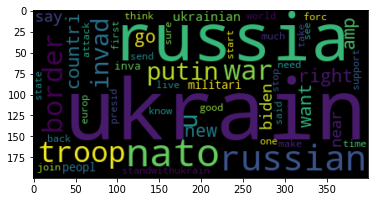

In [ ]:
wc = WordCloud(max_font_size=100, max_words = 50,collocations=False).generate(pos_text)

plt.imshow(wc, interpolation='bilinear')
plt.show()

In [ ]:
df_neg = data[data['sentiment'] == 0]
df_neg.head()

,clean_tweet,sentiment,retweetCount,likeCount
0,joe biden say get place putin decid invad russ...,0,26,99
1,profpaulpoast like countri sovereign proven va...,0,0,2
3,jakehas groutandgo mysticaura_ skylarjordan al...,0,0,0
4,__t___d carolecadwalla estellecostanza point u...,0,0,0
5,juliet_turn next ground actual go ukrain line ...,0,0,0


In [ ]:
neg_text = " ".join(text for text in df_neg['clean_tweet'])

len(neg_text) 

108155403

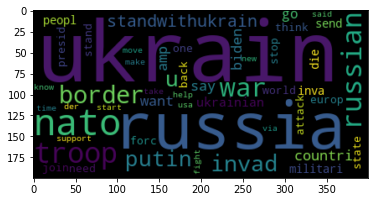

In [ ]:
wc = WordCloud(max_font_size=100, max_words = 50,collocations=False).generate(neg_text)

plt.imshow(wc, interpolation='bilinear')
plt.show()

In [ ]:
print("Total Retweet count for Positive Tweets: ", '{:.2f}'.format(df_pos['retweetCount'].sum()))
print("Total Retweet count for Negative/Neutral Tweets: ", '{:.2f}'.format(df_neg['retweetCount'].sum()))

print("Total Like count for Positive Tweets: ", '{:.2f}'.format(df_pos['likeCount'].sum()))
print("Total Like count for Negative/Neutral Tweets: ", '{:.2f}'.format(df_neg['likeCount'].sum()))

print("Average Retweet count for Positive Tweets: ", '{:.2f}'.format(df_pos['retweetCount'].mean()))
print("Average Retweet count for Negative/Neutral Tweets: ", '{:.2f}'.format(df_neg['retweetCount'].mean()))

print("Average Like count for Positive Tweets: ", '{:.2f}'.format(df_pos['likeCount'].mean()))
print("Average Like count for Negative/Neutral Tweets: ", '{:.2f}'.format(df_neg['likeCount'].mean()))

Total Retweet count for Positive Tweets:  1805789.00
Total Retweet count for Negative/Neutral Tweets:  4087827.00
Total Like count for Positive Tweets:  7550820.00
Total Like count for Negative/Neutral Tweets:  17888738.00
Average Retweet count for Positive Tweets:  4.89
Average Retweet count for Negative/Neutral Tweets:  4.32
Average Like count for Positive Tweets:  20.43
Average Like count for Negative/Neutral Tweets:  18.89


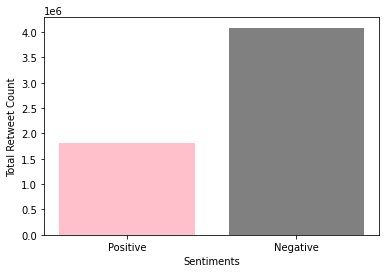

In [ ]:
x = ['Positive', 'Negative']
y = [df_pos['retweetCount'].sum(), df_neg['retweetCount'].sum()]

plt.bar(x, y, color=['pink', 'gray'])
plt.xlabel('Sentiments')
plt.ylabel('Total Retweet Count')
plt.show()

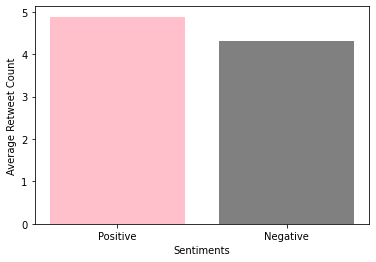

In [ ]:
x = ['Positive', 'Negative']
y = [df_pos['retweetCount'].mean(), df_neg['retweetCount'].mean()]

plt.bar(x, y, color=['pink', 'gray'])
plt.xlabel('Sentiments')
plt.ylabel('Average Retweet Count')
plt.show()

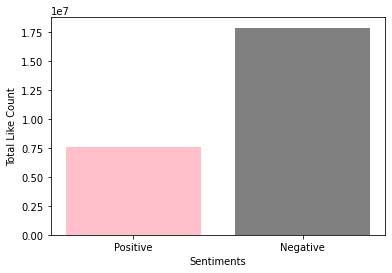

In [ ]:
x = ['Positive', 'Negative']
y = [df_pos['likeCount'].sum(), df_neg['likeCount'].sum()]

plt.bar(x, y, color=['pink', 'gray'])
plt.xlabel('Sentiments')
plt.ylabel('Total Like Count')
plt.show()

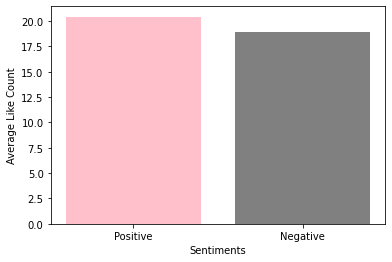

In [ ]:
x = ['Positive', 'Negative']
y = [df_pos['likeCount'].mean(), df_neg['likeCount'].mean()]

plt.bar(x, y, color=['pink', 'gray'])
plt.xlabel('Sentiments')
plt.ylabel('Average Like Count')
plt.show()

# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, max_features = 50000, stop_words='english')

bow = bow_vectorizer.fit_transform(data['clean_tweet'])

bow.shape

(1316605, 50000)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df=2, max_features = 50000, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(data['clean_tweet'])

tfidf.shape

# Dataset splitting

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(bow, data['sentiment'], test_size = 0.25, random_state = 0)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)


(987453, 50000)
(987453,)
(329152, 50000)
(329152,)


In [20]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(tfidf, data['sentiment'], test_size = 0.25, random_state = 0)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)


(987453, 50000)
(987453,)
(329152, 50000)
(329152,)


# Model Training

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)


[[233768   3042]
 [  9062  83280]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    236810
           1       0.96      0.90      0.93     92342

    accuracy                           0.96    329152
   macro avg       0.96      0.94      0.95    329152
weighted avg       0.96      0.96      0.96    329152



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)


[[233230   3580]
 [ 10622  81720]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    236810
           1       0.96      0.88      0.92     92342

    accuracy                           0.96    329152
   macro avg       0.96      0.93      0.95    329152
weighted avg       0.96      0.96      0.96    329152



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = MultinomialNB()
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)



[[208155  28655]
 [ 10302  82040]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91    236810
           1       0.74      0.89      0.81     92342

    accuracy                           0.88    329152
   macro avg       0.85      0.88      0.86    329152
weighted avg       0.89      0.88      0.88    329152



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)


[[234979   1831]
 [ 54886  37456]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    236810
           1       0.95      0.41      0.57     92342

    accuracy                           0.83    329152
   macro avg       0.88      0.70      0.73    329152
weighted avg       0.85      0.83      0.80    329152



## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)


[[230907   5903]
 [  7487  84855]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    236810
           1       0.93      0.92      0.93     92342

    accuracy                           0.96    329152
   macro avg       0.95      0.95      0.95    329152
weighted avg       0.96      0.96      0.96    329152



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)


[[229599   7211]
 [  8068  84274]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    236810
           1       0.92      0.91      0.92     92342

    accuracy                           0.95    329152
   macro avg       0.94      0.94      0.94    329152
weighted avg       0.95      0.95      0.95    329152



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)


[[232618   4192]
 [ 18219  74123]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    236810
           1       0.95      0.80      0.87     92342

    accuracy                           0.93    329152
   macro avg       0.94      0.89      0.91    329152
weighted avg       0.93      0.93      0.93    329152



In [21]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)


[[232574   4236]
 [ 19137  73205]]


In [22]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    236810
           1       0.95      0.79      0.86     92342

    accuracy                           0.93    329152
   macro avg       0.93      0.89      0.91    329152
weighted avg       0.93      0.93      0.93    329152

